## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs

In [13]:
import pandas as pd
import numpy as np
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=*&CIVILSTAND=*&K%C3%98N=*&OMR%C3%85DE=*'
ds = pd.read_csv(url, sep=';')
ds.to_csv('dk-stat.csv', encoding='utf-8', index=False)
ds[:20]

,TID,CIVILSTAND,KØN,OMRÅDE,INDHOLD
0,2008K1,I alt,I alt,Hele landet,5475791
1,2008K1,I alt,I alt,Region Hovedstaden,1645825
2,2008K1,I alt,I alt,København,509861
3,2008K1,I alt,I alt,Frederiksberg,93444
4,2008K1,I alt,I alt,Dragør,13261
5,2008K1,I alt,I alt,Tårnby,40016
6,2008K1,I alt,I alt,Albertslund,27602
7,2008K1,I alt,I alt,Ballerup,47116
8,2008K1,I alt,I alt,Brøndby,33831
9,2008K1,I alt,I alt,Gentofte,68913


In [12]:
#ds['TID'] = ds['TID'].str.split('K').str[0]
#ds[:20]

What is the change in pct of divorced danes from 2008 to 2020?

In [17]:
#finds divorced and full pop of 2008k4
divorced_2008_mask = (ds['TID']=='2008K4') & (ds['CIVILSTAND'] == 'Fraskilt') & (ds['OMRÅDE']=='Hele landet') & (ds['KØN'] == 'I alt')
divorced_2008 = sum(ds[divorced_2008_mask]['INDHOLD'])
pop_2008 = sum(ds[(ds['TID']=='2008K4') & (ds['OMRÅDE']=='Hele landet') & (ds['CIVILSTAND'] == 'I alt') & (ds['KØN'] == 'I alt')]['INDHOLD'])

#finds divorced and full pop of 2020k4
divorced_2020_mask = (ds['TID']=='2020K4') & (ds['CIVILSTAND'] == 'Fraskilt') & (ds['OMRÅDE']=='Hele landet') & (ds['KØN'] == 'I alt')
divorced_2020 = sum(ds[divorced_2020_mask]['INDHOLD'])
pop_2020 = sum(ds[(ds['TID']=='2020K4') & (ds['OMRÅDE']=='Hele landet') & (ds['CIVILSTAND'] == 'I alt') & (ds['KØN'] == 'I alt')]['INDHOLD'])

print(f'Percent divorced in 2008 {round(divorced_2008/pop_2008*100,2)}%')
print(f'Percent divorced in 2020 {round(divorced_2020/pop_2020*100,2)}%')

Percent divorced in 2008 7.85%
Percent divorced in 2020 9.46%


Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?

In [62]:
def highest_percentage_per_city(cities):
    highest_percentage = {}
    time = (ds['TID'] =='2020K4')
    gender = (ds['KØN'] == 'I alt')
    unmarried_status = (ds['CIVILSTAND'] =='Ugift')
    every_civil_status = (ds['CIVILSTAND'] =='I alt')
    for city in cities:
        area =(ds['OMRÅDE'] ==city)
        unmarried = sum(ds[time & gender & unmarried_status & area]['INDHOLD'])
        city_pop = sum(ds[time & gender & every_civil_status & area]['INDHOLD'])
        um_pct = round((unmarried/city_pop)*100,2)
        highest_percentage[city] = um_pct
    return {max(highest_percentage,key=highest_percentage.get):highest_percentage[max(highest_percentage,key=highest_percentage.get)]}
        

In [63]:
highest_percentage_per_city(['København','Aarhus','Odense','Aalborg','Esbjerg'])

{'København': 65.49}

Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

In [ ]:
import matplotlib.pyplot as plt

married ={}

for time_period in time:
    year = (ds['TID'] ==time_period)
    marial_status =(ds['OMRÅDE'] =='Gift/')
    area =(ds['OMRÅDE'] =='Hele landet')
    gender = (ds['KØN'] == 'I alt')
    
plt.bar(sorted_dict.keys(), sorted_dict.values())
plt.title('Population for area', fontsize=14)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
plt.show()

In [70]:
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=*&Tid=*&ALDER=*'
ds = pd.read_csv(url, sep=';')
ds.to_csv('dk-stat-alder.csv', encoding='utf-8', index=False)
ds[:20]

,CIVILSTAND,TID,ALDER,INDHOLD
0,I alt,2008K1,I alt,5475791
1,I alt,2008K1,0 år,64412
2,I alt,2008K1,1 år,65722
3,I alt,2008K1,2 år,64993
4,I alt,2008K1,3 år,65216
5,I alt,2008K1,4 år,65263
6,I alt,2008K1,5 år,64711
7,I alt,2008K1,6 år,65825
8,I alt,2008K1,7 år,67681
9,I alt,2008K1,8 år,66939


In [72]:
#Fjerner i alt fra alder listen
ds= ds[ds['ALDER'] !='I alt']

In [74]:
ages =list(ds['ALDER'].unique())
ages

['0 år',
 '1 år',
 '2 år',
 '3 år',
 '4 år',
 '5 år',
 '6 år',
 '7 år',
 '8 år',
 '9 år',
 '10 år',
 '11 år',
 '12 år',
 '13 år',
 '14 år',
 '15 år',
 '16 år',
 '17 år',
 '18 år',
 '19 år',
 '20 år',
 '21 år',
 '22 år',
 '23 år',
 '24 år',
 '25 år',
 '26 år',
 '27 år',
 '28 år',
 '29 år',
 '30 år',
 '31 år',
 '32 år',
 '33 år',
 '34 år',
 '35 år',
 '36 år',
 '37 år',
 '38 år',
 '39 år',
 '40 år',
 '41 år',
 '42 år',
 '43 år',
 '44 år',
 '45 år',
 '46 år',
 '47 år',
 '48 år',
 '49 år',
 '50 år',
 '51 år',
 '52 år',
 '53 år',
 '54 år',
 '55 år',
 '56 år',
 '57 år',
 '58 år',
 '59 år',
 '60 år',
 '61 år',
 '62 år',
 '63 år',
 '64 år',
 '65 år',
 '66 år',
 '67 år',
 '68 år',
 '69 år',
 '70 år',
 '71 år',
 '72 år',
 '73 år',
 '74 år',
 '75 år',
 '76 år',
 '77 år',
 '78 år',
 '79 år',
 '80 år',
 '81 år',
 '82 år',
 '83 år',
 '84 år',
 '85 år',
 '86 år',
 '87 år',
 '88 år',
 '89 år',
 '90 år',
 '91 år',
 '92 år',
 '93 år',
 '94 år',
 '95 år',
 '96 år',
 '97 år',
 '98 år',
 '99 år',
 '100 år',

In [86]:
married=[]
unmarried=[]
marial_status1 = (ds['CIVILSTAND'] =='Gift/separeret')
marial_status2 = (ds['CIVILSTAND'] =='Ugift')
time = (ds['TID']=='2020K4')

for age in ages:

    age_mask = (ds['ALDER']==age)
    married.append(sum(ds[time & marial_status1 & age_mask]['INDHOLD']))
    unmarried.append(sum(ds[time & marial_status2 & age_mask]['INDHOLD']))

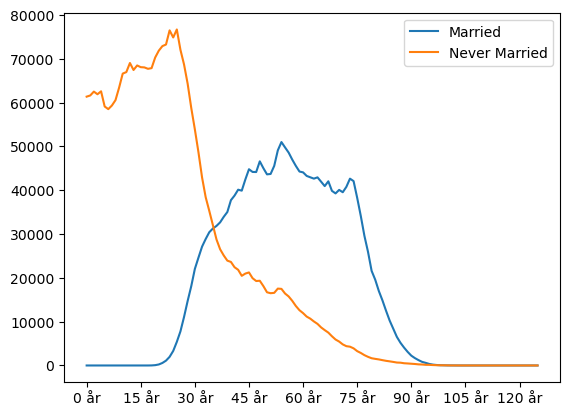

In [92]:
import matplotlib.pyplot as plt
plt.plot(ages,married, label = 'Married')
plt.plot(ages,unmarried, label = 'Never Married')
plt.xticks(ages[::15])

plt.legend()
plt.show()